In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import cv2
import glob
from google.colab.patches import cv2_imshow

In [ ]:
os.mkdir('/content/drive/MyDrive/TSDN 2022/Grayscale/1')
os.mkdir('/content/drive/MyDrive/TSDN 2022/Grayscale/2')
os.mkdir('/content/drive/MyDrive/TSDN 2022/Grayscale/3')
images_path1 = glob.glob('/content/drive/MyDrive/TSDN 2022/bahan/1/*.jpeg')
images_path2 = glob.glob('/content/drive/MyDrive/TSDN 2022/bahan/2/*.jpeg')
images_path3 = glob.glob('/content/drive/MyDrive/TSDN 2022/bahan/3/*.jpeg')

In [ ]:
i = 0
for image in images_path1:
  img = cv2.imread(image)
  gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('/content/drive/MyDrive/TSDN 2022/Grayscale/1/image%02i.jpeg' %i, gray1)
  i += 1
  cv2.waitKey(600)
  cv2.destroyAllWindows()

In [ ]:
i = 0
for image in images_path2:
  img = cv2.imread(image)
  gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('/content/drive/MyDrive/TSDN 2022/Grayscale/2/image%02i.jpeg' %i, gray2)
  i += 1
  cv2.waitKey(600)
  cv2.destroyAllWindows()

In [ ]:
i = 0
for image in images_path3:
  img = cv2.imread(image)
  gray3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('/content/drive/MyDrive/TSDN 2022/Grayscale/3/image%02i.jpeg' %i, gray3)
  i += 1
  cv2.waitKey(600)
  cv2.destroyAllWindows()

In [ ]:
base_dir = '/content/drive/MyDrive/TSDN 2022'
!ls '/content/drive/MyDrive/TSDN 2022'

 bahan	 Grayscale  'Model CNN'  'Model Lain'   train   validation


In [ ]:
bahan_dir = os.path.join(base_dir,'Grayscale')
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

In [ ]:
one_dir = os.path.join(bahan_dir,'1/')
two_dir = os.path.join(bahan_dir,'2/')
three_dir = os.path.join(bahan_dir,'3/')

print("Train for Each Classes")
print("One:",len(os.listdir(one_dir)))
print("Two:",len(os.listdir(two_dir)))
print("Three:",len(os.listdir(three_dir)))

Train for Each Classes
One: 1131
Two: 1212
Three: 1381


In [ ]:
train_1 = os.path.join(train_dir,'1/')
train_2 = os.path.join(train_dir,'2/')
train_3 = os.path.join(train_dir,'3/')

val_1 = os.path.join(val_dir,'1/')
val_2 = os.path.join(val_dir,'2/')
val_3 = os.path.join(val_dir,'3/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source,train,val,train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source),total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file,destination)
  
  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file,destination)

train_ratio = 0.9


train_val_split(one_dir,train_1,val_1,train_ratio)
train_val_split(two_dir,train_2,val_2,train_ratio)
train_val_split(three_dir,train_3,val_3,train_ratio)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (250,250),
    batch_size = 100,
    class_mode = "categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (250,250),
    batch_size = 100,
    class_mode = "categorical"
)

Found 7448 images belonging to 3 classes.
Found 4497 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = ()):
    if(logs.get("accuracy") > 0.99):
      print("\accuracy has achieved 99%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3,seed = 112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5,seed = 112),
    tf.keras.layers.Dense(units = 3,activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [ ]:
model.compile(loss ='categorical_crossentropy',
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = 5,
    validation_data = val_generator,
    validation_steps = 10,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/50
30/30 [==============================] - 495s 16s/step - loss: 1.2204 - accuracy: 0.3650 - val_loss: 1.0863 - val_accuracy: 0.3810
Epoch 2/50
30/30 [==============================] - 385s 13s/step - loss: 1.0804 - accuracy: 0.4067 - val_loss: 1.0785 - val_accuracy: 0.4290
Epoch 3/50
30/30 [==============================] - 324s 11s/step - loss: 1.0621 - accuracy: 0.4453 - val_loss: 1.0393 - val_accuracy: 0.4810
Epoch 4/50
30/30 [==============================] - 296s 10s/step - loss: 1.0352 - accuracy: 0.4793 - val_loss: 1.0190 - val_accuracy: 0.5100
Epoch 5/50
30/30 [==============================] - 285s 10s/step - loss: 1.0176 - accuracy: 0.5037 - val_loss: 0.9982 - val_accuracy: 0.5340
Epoch 6/50
30/30 [==============================] - 296s 10s/step - loss: 0.9794 - accuracy: 0.5337 - val_loss: 0.9670 - val_accuracy: 0.5370
Epoch 7/50
30/30 [==============================] - 298s 10s/step - loss: 0.9730 - accuracy: 0.5330 - val_loss: 0.9141 - val_accuracy: 0.5620
Epoch 

In [ ]:
model.evaluate(train_generator)

75/75 [==============================] - 251s 3s/step - loss: 0.4952 - accuracy: 0.7974


[0.4951585531234741, 0.7973952889442444]

Saving image-262.jpeg to image-262.jpeg
1/1 [==============================] - 0s 45ms/step
image-262.jpeg
[[1. 0. 0.]]
This image belongs to class 1


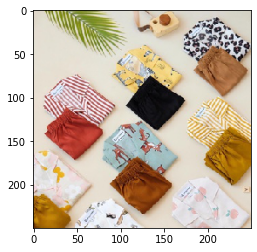

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import load_img
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size = (250,250))
  # img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis= 0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size = 100)

  print(fn)


  class_list  = os.listdir(train_dir)
  print(np.round(classes))
  
  for j in range(3):
    if np.round(classes[0][j]) == 1. :
      print('This image belongs to class', class_list[j])
      break

In [ ]:
model.save('/content/drive/MyDrive/Model CNN')

In [ ]:
model = load_model('/content/drive/MyDrive/Model CNN')